## Chapter 6 Ordinary Differential Equation (ODE)

* 6.1 Initial Value Problems
  * 6.1.1 Euler's Method
  * 6.1.2 Existence, uniqueness, and continuity for solutions
  * 6.1.3 First-order linear equations
* 6.2 Analysis of IVP Solvers
  * The Explicit Trapezoid Method
* **6.3 Systems of ODEs**
* 6.4 Runge-Kutta Methods and Applications

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rc

plt.rcParams['xtick.labelsize']=20      # change the tick label size for x axis
plt.rcParams['ytick.labelsize']=20      # change the tick label size for x axis
plt.rcParams['axes.linewidth']=1        # change the line width of the axis
plt.rcParams['xtick.major.width'] = 3   # change the tick line width of x axis
plt.rcParams['ytick.major.width'] = 3   # change the tick line width of y axis 
rc('text', usetex=False)                # disable LaTeX rendering in plots
rc('font',**{'family':'DejaVu Sans'})   # set the font of the plot to be DejaVu Sans

### 6.3 Systems of Ordinary Differential Equations

Instead of solving one ODE, we can also solve many related ODEs using the methods we have been learning.  In this class, you will learn how to solve a system of ODEs and we will look at two physical examples:
1. pendulum
2. orbital mechanics

The **order** of a differential equation refers to the highest order derivative appearing in the equation. A first-order system has the form

\begin{align}
y_1′ &= f_1(t,y_1,\dots,y_n)\\
y_2′ &= f_2(t,y_1,\dots,y_n)\\
\vdots\\
y_n′ &= f_n(t,y_1,\dots,y_n)
\end{align}

In an initial value problem, each variable needs its own initial condition.


#### Example: Apply Euler’s Method to the first-order system of two equations:
\begin{align}
y_1′ &= y_2^2 − 2y_1\\
y_2′ &= y_1 − y_2 − ty_2^2\\
y_1(0) &= 0\\
y_2(0) &= 1
\end{align}

Since now we need to call $f_1(t, y_1, y_2)$ and $f_2(t, y_1, y_2)$ many times, let's firt write functions for $f_1(t, y_1, y_2)$ and $f_2(t, y_1, y_2)$.

In [ ]:
def f_1(t, y_1, y_2):
  return 

def f_2(t, y_1, y_2):
  return 

Now we can write a generlized Euler step for any functions

In [ ]:
y_1_0 = 0.0
y_2_0 = 1.0
start = 0
end = 1.0
h = 0.1
m = int((end-start)/h)+1

t = np.linspace(start, end, m)
w_1 = np.zeros(m)
w_2 = np.zeros(m)
w_1[0] = y_1_0
w_2[0] = y_2_0
for i in range(0, len(t)-1):
  w_1[i+1] = 
  w_2[i+1] = 

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('axes', 0.0))
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
plt.plot(t, w_1, linewidth = 2)
plt.plot(t, w_2, linewidth = 2)
plt.scatter(t, w_1, s = 50)
plt.scatter(t, w_2, s = 50)
plt.xlabel('t', fontsize = 25, loc='right')
plt.ylabel('y', fontsize = 25)

How do these solutions compare to analytical solutions?
For this system of equations, we can solve them exactly:
\begin{align}
y_1(t) &= te^{-2t}\\
y_2(t) &= e^{-t}
\end{align}

In [ ]:
y_1 = t*np.exp(-2*t)
y_2 = np.exp(-t)

Text(0, 0.5, 'y')

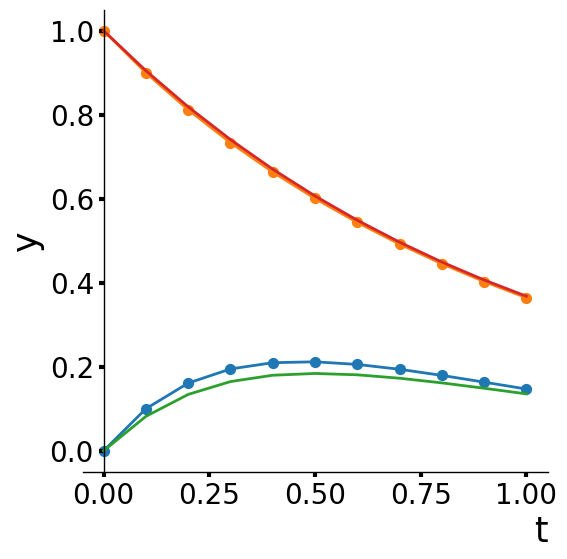

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('axes', 0.0))
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
plt.plot(t, w_1, linewidth = 2)
plt.plot(t, w_2, linewidth = 2)
plt.plot(t, y_1, linewidth = 2)
plt.plot(t, y_2, linewidth = 2)
plt.scatter(t, w_1, s = 50)
plt.scatter(t, w_2, s = 50)
plt.xlabel('t', fontsize = 25, loc='right')
plt.ylabel('y', fontsize = 25)

There are also ways to combine all the $y$ functions in to a vector and solve them all at the same time.  It is much easier to use the `numpy` and `scipy` built-in ODE solvers for those.  We will use the built-in solvers in later classes.

### 6.3.1 Higher order equations

A single differential equation of higher order can be converted to a system of first order equations.  Let
$$y^{(n)}=f(t, y, y', y'',\dots,y^{(n-1)})$$
be an $n$th-order ODE.  We can break it into a system of first order ODEs by defining new variables
\begin{align}
y_1&=y\\
y_2&=y'\\
y_3&=y''\\
&\vdots\\
y_n&=y^{(n-1)}
\end{align}

Now the original ODE is
$$y_n'=f(t, y_1, y_2,\dots,y_n)$$,
and the system of equations we need to solve is
\begin{align}
y_1'&=y_2\\
y_2'&=y_3\\
y_3'&=y_4\\
&\vdots\\
y_{n-1}'&=y_n\\
y_n'&=f(t, y_1, y_2,\dots,y_n)
\end{align}

#### Example, convert the third-order differential equation
$$y'''=a(y'')^2-y'+yy''+\sin t$$
to a system of first-order differential equations.

Set

then the third-order differential equation is equivalent to

and now we can solve them using an ODE solver of your choice.

### 6.3.2 Computer simulation: the pendulum

the differential equation governing the frictionless pendulum is
$$mly''=F=-mg\sin y$$
See the physical meaning of every parameter in the plot below.


Text(0, 1, 'y')

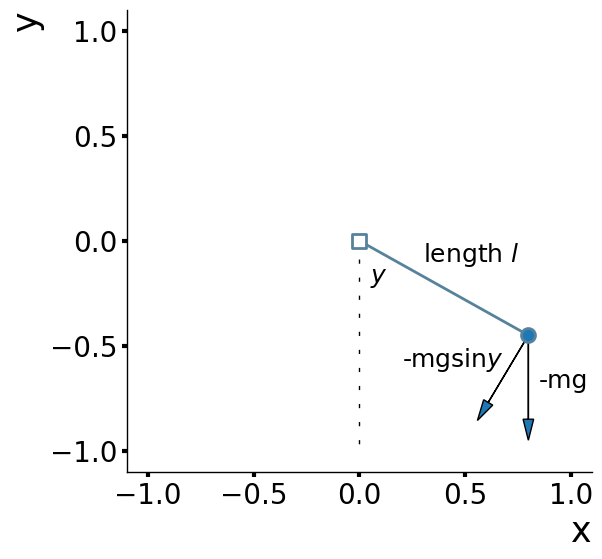

In [ ]:
#@title Pendulum Plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('axes', 0.0))
ax.spines['left'].set_position(('axes', 0.0))
ax.spines['right'].set_color('none')
plt.scatter(0, 0, marker='s', s = 100, linewidths = 2, edgecolors = '#57829c', 
            facecolors='#ffffff', zorder=10)
plt.scatter(0.8, -0.45, marker='o', s = 100, linewidths = 2, 
            edgecolors = '#57829c', zorder=10)
plt.plot([0, 0.8], [0, -0.45], linewidth = 2, color = '#57829c')
plt.plot([0, 0.0], [0, -1], '--', dashes=(3, 10), linewidth = 1, color = '#000000')
plt.arrow(0.8, -0.45, 0.0, -0.4, head_width = 0.05, head_length=0.1)
plt.arrow(0.8, -0.45, -0.19, -0.32, head_width = 0.05, head_length=0.1)
plt.text(0.05, -0.2, r'$y$', fontsize = 18)
plt.text(0.3, -0.1, 'length '+r'$l$', fontsize = 18)
plt.text(0.2, -0.6, '-mgsin'+r'$y$', fontsize = 18)
plt.text(0.85, -0.7, '-mg', fontsize = 18)
plt.ylim(-1.1, 1.1)
plt.xlim(-1.1, 1.1)
plt.xlabel('x', fontsize = 25, loc='right')
plt.ylabel('y', fontsize = 25, loc='top')

We can write this second-order ODE into two first-order equations.
\begin{align}
y_1'&=y_2\\
y_2'&=-\frac{g}{l}\sin y_1
\end{align}

Since these two equations have physical meaning, we can't have arbitrary intial conditions.  Here we set
\begin{align}
y_1(0)&=\pi/2\\
y_2(0)&=0,
\end{align}
indicating a pendulum starting from a position straight out to the right with an initial velocity of 0.

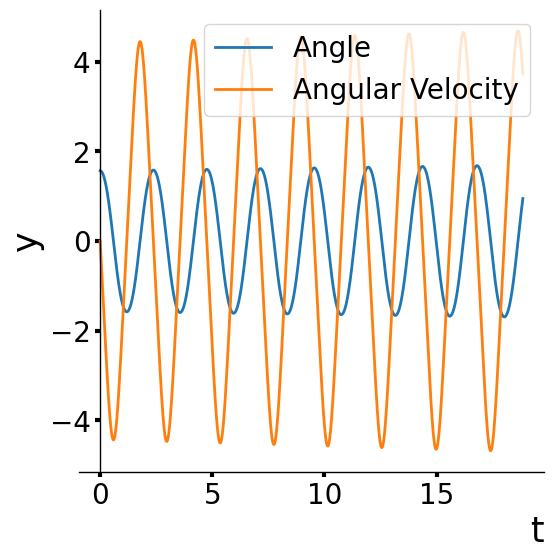

In [ ]:
def f_1(t, y_1, y_2):
  return 

def f_2(t, y_1, y_2, g=9.8, l=1.0):
  return 

y_1_0 = np.pi/2.0
y_2_0 = 0.0
start = 0
end = 6*np.pi
h = 0.001
m = int((end-start)/h)+1

t = np.linspace(start, end, m)
w_1 = np.zeros(m)
w_2 = np.zeros(m)
w_1[0] = y_1_0
w_2[0] = y_2_0
for i in range(0, len(t)-1):
  w_1[i+1] = w_1[i]+h*f_1(t[i], w_1[i], w_2[i])
  w_2[i+1] = w_2[i]+h*f_2(t[i], w_1[i], w_2[i])

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('axes', 0.0))
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
plt.plot(t, w_1, linewidth = 2, label = "Angle")
plt.plot(t, w_2, linewidth = 2, label = "Angular Velocity")
plt.xlabel('t', fontsize = 25, loc='right')
plt.ylabel('y', fontsize = 25)
plt.legend(fontsize =20)

Let's use the trapezoid method to sove it.

#### Explicit Trapezoid Method
\begin{align}
w_0 &= y_0\\
w_{i+1} &=w_i + \frac{h}{2}(f(t_i,w_i)+ f(t_i +h,w_i +hf(t_i,w_i)))
\end{align}

Text(0, 0.5, 'y')

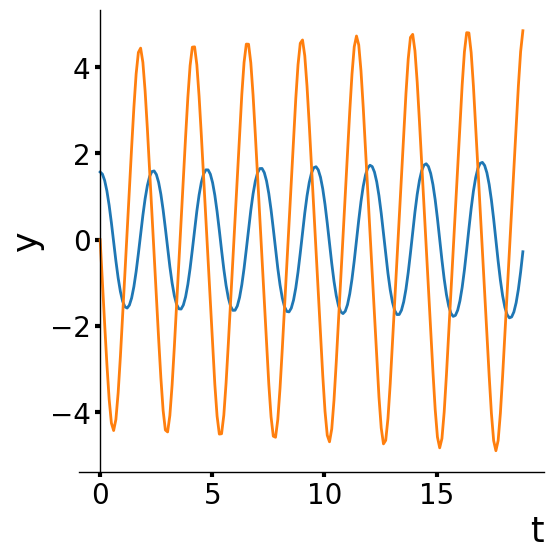

In [ ]:
def f_1(t, y_1, y_2):
  return y_2

def f_2(t, y_1, y_2, g=9.8, l=1.0):
  return -g*np.sin(y_1)/l

y_1_0 = np.pi/2.0
y_2_0 = 0.0
start = 0
end = 6*np.pi
h = 0.1
m = int((end-start)/h)+1

t = np.linspace(start, end, m)
w_1 = np.zeros(m)
w_2 = np.zeros(m)
w_1[0] = y_1_0
w_2[0] = y_2_0
for i in range(0, len(t)-1):
  w_1[i+1] = 
  w_2[i+1] = 

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('axes', 0.0))
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
plt.plot(t, w_1, linewidth = 2)
plt.plot(t, w_2, linewidth = 2)
plt.xlabel('t', fontsize = 25, loc='right')
plt.ylabel('y', fontsize = 25)

### 6.3.3 Computer simulation: orbital mechanics

\begin{align}
x′ &= v_x \\
v_x′ &=− \frac{gm_2x }{(x^2 + y^2)^{3/2}}\\
y′ &= v_y\\ 
v_y' &= −\frac{gm_2y}{(x^2 + y^2)^{3/2}}
\end{align}

(-5.0, 5.0)

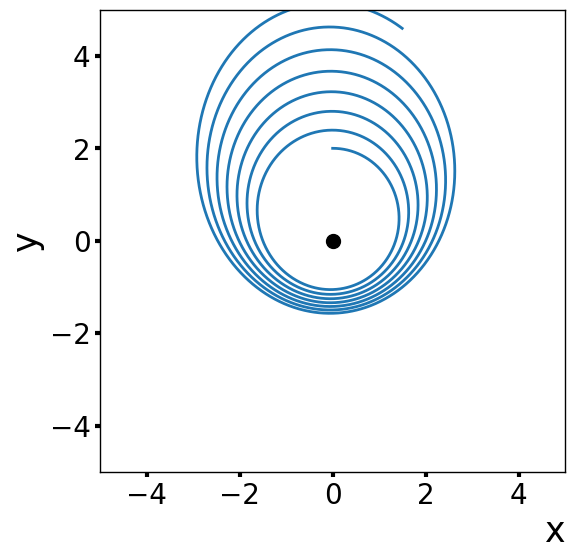

In [ ]:
def f_1(t, y_1, y_2, y_3, y_4):
  return 

def f_2(t, y_1, y_2, y_3, y_4, g=1.0, m=3.0):
  return 

def f_3(t, y_1, y_2, y_3, y_4):
  return 

def f_4(t, y_1, y_2, y_3, y_4, g=1.0, m=3.0):
  return 

y_1_0 = 0.0
y_2_0 = 1.0
y_3_0 = 2.0
y_4_0 = 0.0
start = 0
end = 100
h = 0.01
m = int((end-start)/h)+1

t = np.linspace(start, end, m)
w_1 = np.zeros(m)
w_2 = np.zeros(m)
w_3 = np.zeros(m)
w_4 = np.zeros(m)
w_1[0] = y_1_0
w_2[0] = y_2_0
w_3[0] = y_3_0
w_4[0] = y_4_0
for i in range(0, len(t)-1):
  w_1[i+1] = 
  w_2[i+1] = 
  w_3[i+1] = 
  w_4[i+1] = 

fig = plt.figure(figsize=(6, 6))
plt.plot(w_1, w_3, linewidth = 2)
plt.scatter(0, 0, s = 100, color="000000")
plt.xlabel('x', fontsize = 25, loc='right')
plt.ylabel('y', fontsize = 25)
plt.xlim(-5, 5)
plt.ylim(-5, 5)